#Indrodução


>### Descrição:
>***
Nesse dataset temos um conjunto de dados sobre quantidade de peças produzidas, boas e ruins, e as respectivas datas de produção. Os dados simulam um dos projetos de melhoria que fui responsável. Nele um produto não tinha uma performance considerada boa, ou seja, muitas peças eram descartadas por evidenciarem algum tipo de falha. 
>
>Realizamos um projeto Six Sigma de melhoria contínua a fim de melhorar o rendimento desse produto. Após todo o planejamento, estudo e identificação da causa raiz, implementamos uma modificação em 09/01/2022 (data fictícia). Portanto nesse notebook eu **testo a hipótese de que após a implementação da melhoria tivemos uma melhora na performance do produto.**
>
>Estou sendo intencionalmente vago nas informações do projeto para preservar a confidencialidade dos dados e empresa.


>### Dados:
>***

|Campo|Descrição|
|---|---|
|PartName|Código/Nome do produto|
|OK|Quantidade de peças boas|
|Scrap|Quantidade de peças descartadas|
|Date|Data de produção das peças|
|Performance|Porcentagem de de peças boas|

##Importando bibliotecas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

##Importando dados

In [ ]:
dados = pd.read_excel('drive/MyDrive/Colab Notebooks/Dados_melhoria.xlsx')

##Visualizando os dados

In [ ]:
dados.head()

,PartName,OK,Scrap,Date
0,Produto A,256,10,2021-11-24
1,Produto A,24,15,2021-11-24
2,Produto A,24,15,2021-11-24
3,Produto A,256,10,2021-11-24
4,Produto A,68,19,2021-11-27


###Informações e estatísticas descritivas

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   PartName  89 non-null     object        
 1   OK        89 non-null     int64         
 2   Scrap     89 non-null     int64         
 3   Date      89 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.9+ KB


In [ ]:
dados.shape

(89, 4)

In [ ]:
dados.describe()

,OK,Scrap
count,89.000000,89.000000
mean,176.258427,16.932584
std,115.406449,16.965070
min,2.000000,0.000000
25%,69.000000,8.000000
50%,194.000000,14.000000
75%,271.000000,21.000000
max,370.000000,122.000000


Primeiramente percebemos que não há dados nulos no nosso dataset, temos ao todo 89 produções do Produto A, e através do resumo estatístico não visualizamos nenhum valor discrepante.

##Agrupando os dados por data

Vamos então unir as produções que ocorreram no mesmo dia, somando as peças boas e refugos do mesmo lote de produção.

In [ ]:
dados = dados.groupby('Date').sum()

In [ ]:
dados = dados.reset_index()

In [ ]:
dados.head()

,Date,OK,Scrap
0,2021-11-24,560,50
1,2021-11-27,530,60
2,2021-12-01,436,70
3,2021-12-03,576,59
4,2021-12-05,388,30


##Criando coluna de Performance

Criaremos agora uma coluna que mostrará a porcentagem de peças boas de cada produção.

In [ ]:
dados['Performance'] = ((1 - (dados['Scrap'] / (dados['OK'] + dados['Scrap']))) *100).round(2)

In [ ]:
dados.head()

,Date,OK,Scrap,Performance
0,2021-11-24,560,50,91.80
1,2021-11-27,530,60,89.83
2,2021-12-01,436,70,86.17
3,2021-12-03,576,59,90.71
4,2021-12-05,388,30,92.82


##Separando os dados

Para compararmos nossos dados, vamos separar o dataset em dados antes e depois da modificação, tendo como data de corte o dia 09/01/2022.

###Antes da modificação

In [ ]:
antes = (dados['Date'] <= '2022-01-09')
dados_antes = dados.loc[antes]
dados_antes

,Date,OK,Scrap,Performance
0,2021-11-24,560,50,91.80
1,2021-11-27,530,60,89.83
2,2021-12-01,436,70,86.17
3,2021-12-03,576,59,90.71
4,2021-12-05,388,30,92.82
5,2021-12-08,580,64,90.06
6,2021-12-10,1132,318,78.07
7,2021-12-12,433,53,89.09
8,2021-12-15,584,34,94.50
9,2021-12-28,508,98,83.83


In [ ]:
print('Média de performance antes = ', dados_antes.Performance.mean())

Média de performance antes =  87.98235294117647


###Depois da modificação

In [ ]:
depois = (dados['Date'] > '2022-01-09')
dados_depois = dados.loc[depois]
dados_depois

,Date,OK,Scrap,Performance
17,2022-01-12,626,32,95.14
18,2022-01-14,389,7,98.23
19,2022-01-15,686,28,96.08
20,2022-01-19,654,30,95.61
21,2022-01-21,294,20,93.63
22,2022-01-23,630,22,96.63
23,2022-01-27,642,44,93.59
24,2022-01-29,736,23,96.97
25,2022-02-02,718,28,96.25
26,2022-02-03,742,31,95.99


In [ ]:
print('Média de performance depois = ', dados_depois.Performance.mean())

Média de performance depois =  93.76583333333333


##Graficamente

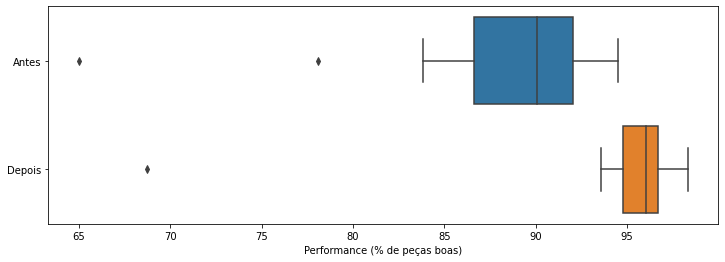

In [ ]:
plt.figure(figsize=(12,4))
_,_ = sns.boxplot(data = [dados_antes.Performance, dados_depois.Performance], orient='h', width=0.8).set(yticklabels=['Antes','Depois'], xlabel='Performance (% de peças boas)')

Graficamente podemos observar que além de existir uma performance mais alta após a implementação da melhoria, notamos que houve uma menor variação nos dados. Entretanto, houve uma melhora estatísticamente comprovada ? É o que vamos analisar no próximo tópico.

##Teste de hipótese

Vamos testar a hipótese que após a implementação da melhoria houve uma melhora na porcentagem de peças boas. Vamos considerar um intervalo de confiança de 95%


### $H_0: \mu_{antes} = \mu_{depois}$

### $H_1: \mu_{antes} > \mu_{depois}$

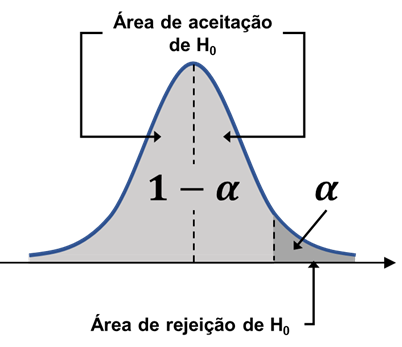

Para escolhermos o tipo de teste estatístico que vamos aplicar, primeiramente é necessário verificar a normalidade dos dados.

###Normalidade dos dados

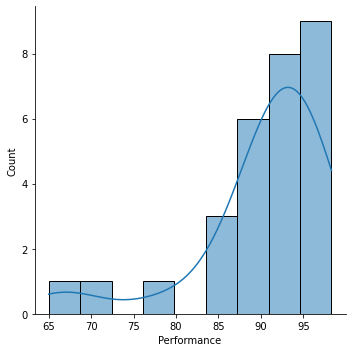

In [ ]:
sns.displot(dados.Performance, kde=True)

Fica evidente que nossos dados não se distribuem normalmente. Assim vamos utilizar o teste de **Wilcoxon** para avaliar os dados, esse teste é empregado quando se deseja comparar duas amostras relacionadas, principamente quando queremos testar a diferença de duas condições do mesmo elemento.

###Significância

In [ ]:
alpha = 0.05

###Wilcoxon

In [ ]:
T, p_valor = wilcoxon(dados_antes.Performance.tail(12), dados_depois.Performance, alternative='less')
print('T = ', T)
print('Pvalue = ',p_valor)

T =  11.0
Pvalue =  0.0140280620746218


####Rejeitar $H_0$ se o valor $p\leq\alpha$

In [ ]:
if (p_valor <= alpha):
  print('Rejeitar H0')
else:
  print('Aceitar H0')

Rejeitar H0


##Conclusão

Como nosso P_valor é menor que a significancia do teste, nós rejeitamos a hipótese nula que os dados antes da implementação da melhoria são iguais aos dados depois. Assim ficamos com a hipótese alternativa de que houve uma melhora na performance do produto.